# Exploratory Data Analysis (EDA) of the Titanic dataset

Data source: https://www.kaggle.com/c/titanic

Goal of this excercise is to try to solve series of tasks which are very similar to the tasks you will face during working on the first (EDA) project in MAD3/MAVD.

The idea is that you will take a look at the dataset which you have, probably, no prior knowledge and try to form a few hypotheses (de facto circa 3-5 questions) about the data and you will try to find an answers to them. 

**It is mandatory to write down your gained insight about each of the hypotheses in your notebook!**

#### Data Dictionary

|Variable|Definition|Key|
|:-------|:-------|:--------|
|survival|Survival|0 = No, 1 = Yes|
|pclass|Ticket class|1 = 1st, 2 = 2nd, 3 = 3rd|
|sex|Sex||
|Age|Age in years||
|sibsp|# of siblings / spouses aboard the Titanic||
|parch|# of parents / children aboard the Titanic||
|ticket|Ticket number||
|fare|Passenger fare||
|cabin|Cabin number||
|embarked|Port of Embarkation|C = Cherbourg, Q = Queenstown, S = Southampton|

**pclass**: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

**age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

**sibsp**: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

**parch**: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them.

## Import used packages

In [68]:
import pandas as pd # dataframes
import numpy as np # matrices and linear algebra
import matplotlib.pyplot as plt # plotting
import seaborn as sns # another matplotlib interface - styled and easier to use

## Load the data into the Pandas DataFrame - in our case it is a csv file

In [69]:
df = pd.read_csv('titanic.csv', sep=',')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [70]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [71]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [72]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Task 1
**Description:** Is there any effect caused by ... on ...?

**Insight gained:** ......

### Seznam otázek:

Skupinové otázky

- Závislost přežití na věku
- Počet dětí které přežili a měli jenom otce etc.
- Závislost věku na místě nalodění
- Hraje roli titul před jménem na přežití?
- Třída cestujicího a pohlaví? Je v 1. tříde více žen?
- Má vliv místo nalodění na cenu?
- Cena a třída lístku
- Kolik bylo rodin, rodinní přislušníci
- Přežil více žen?
- Byly lístky pro muže dražší?
- Lišil se věk dle pohlaví?
- Typy pasažéru naloděných v odlišných přístavech
- Přežili více lide v páru/manželství/sourozenectví
- Bylo v některém přístavu více rodin?

## Question 1

**Description:** Je nějaká závislost přežití na věku?

**Insight gained:** 

Z histogramu můžeme pozorovat, že děti lehce nad předškolní věk častěji přežili než umřeli. Jinak lidé kolem věku 15, 35 a od 50 do 60 měli celkem vyšší míru přežití. 

Zajímavostí by mohlo být, že přežil nejstarší člověk na palubě.


In [73]:
df_task1 = df.groupby(['Age', 'Survived']).Age.count().reset_index(name='Count')
df_task1

,Age,Survived,Count
0,0.42,1,1
1,0.67,1,1
2,0.75,1,2
3,0.83,1,2
4,0.92,1,1
...,...,...,...
137,70.00,0,2
138,70.50,0,1
139,71.00,0,2
140,74.00,0,1


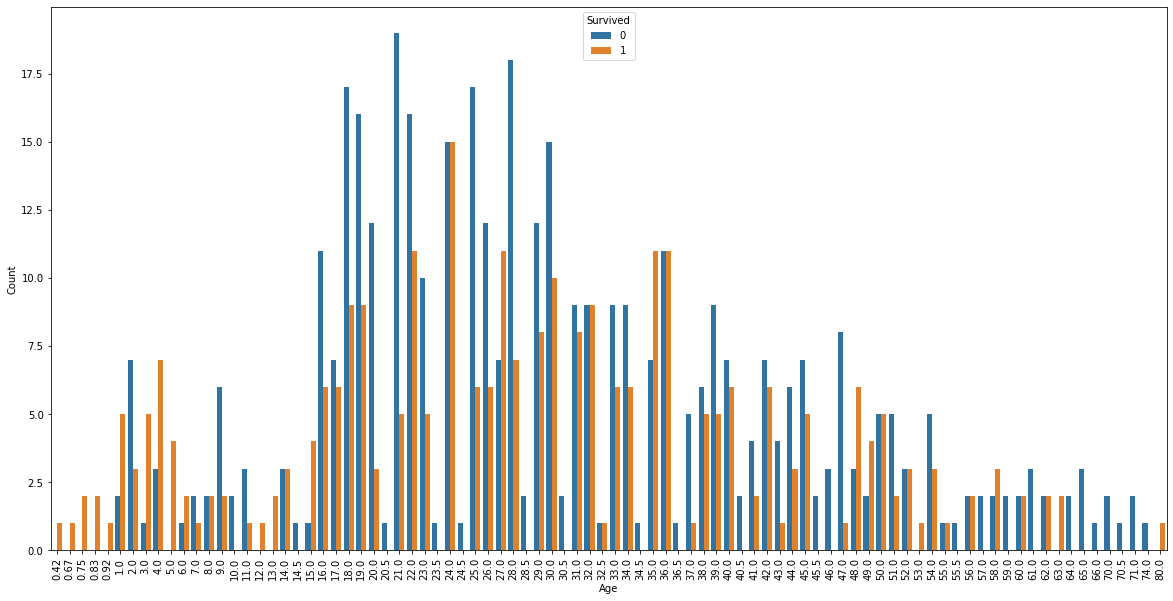

In [74]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df_task1, y='Count', x='Age', hue='Survived')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Survived', ylabel='Age'>

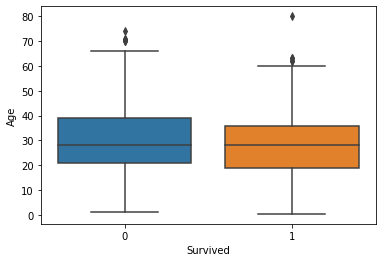

In [75]:
sns.boxplot(data=df, y='Age', x='Survived')

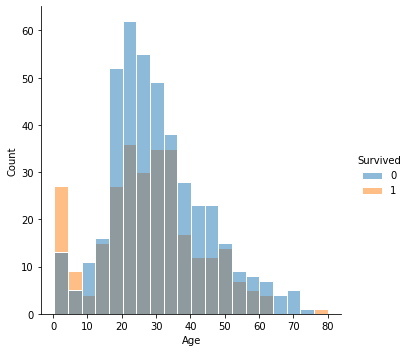

In [76]:
sns.displot(data=df, x='Age', hue='Survived', edgecolor='white')

## Question 2

**Description:** Závislost věku na místě nalodění

**Insight gained:** 

Nic zajímavého z grafu nelze vyčíst. Maximálně, že v Southampton nastupovala většina nejstarších pasažerů co se následně na palubě vyskytovali.

C = Cherbourg, Q = Queenstown, S = Southampton

In [77]:
df_question2 = df.groupby(['Age', 'Embarked']).Embarked.count().reset_index(name='Count')
df_question2

,Age,Embarked,Count
0,0.42,C,1
1,0.67,S,1
2,0.75,C,2
3,0.83,S,2
4,0.92,S,1
...,...,...,...
157,70.00,S,2
158,70.50,Q,1
159,71.00,C,2
160,74.00,S,1


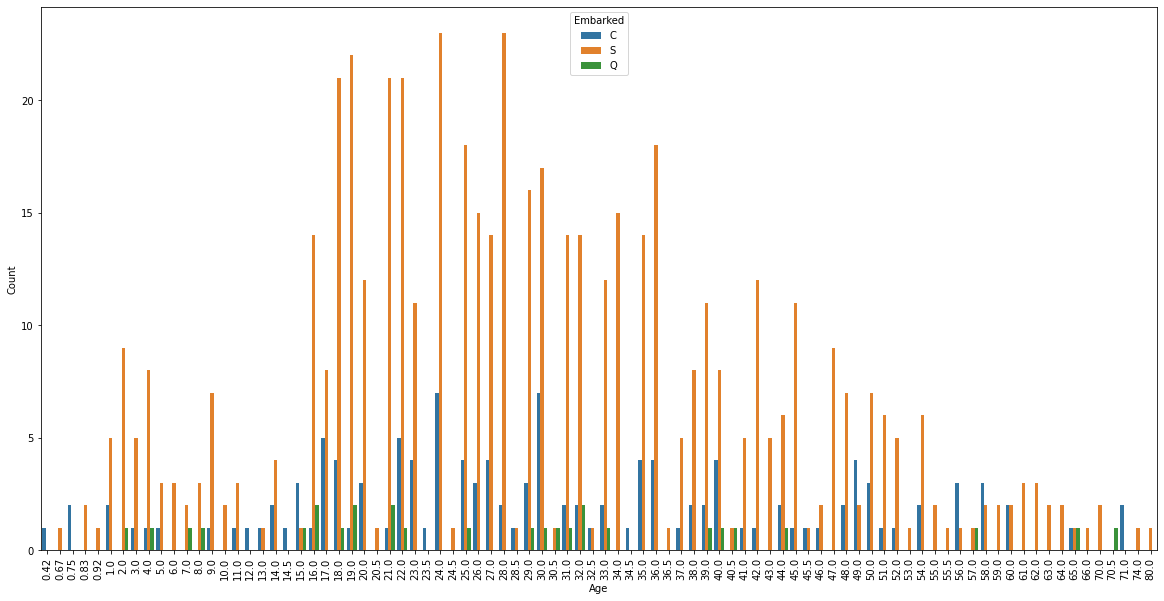

In [78]:
fig = plt.figure(figsize=(20, 10))
sns.barplot(data=df_question2, y='Count', x='Age', hue='Embarked')
plt.xticks(rotation=90);

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

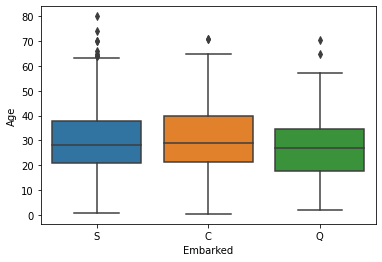

In [79]:
sns.boxplot(data=df, y='Age', x='Embarked')

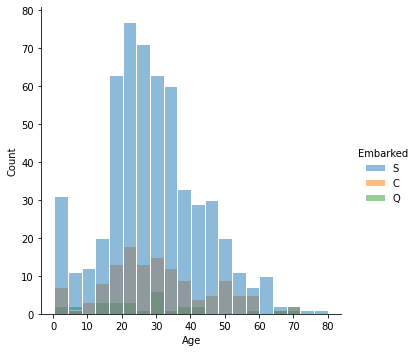

In [80]:
sns.displot(data=df, x='Age', hue='Embarked', edgecolor='white')

## Question 3

**Description:** Třída cestujicího a pohlaví? Je v 1. tříde více žen?

**Insight gained:** 

Z grafu prvního lze pozorovat že v první tříde se vyskytovalo více můžu než žen.

Ačkoliv vzhledem k počtu všech žen na palubě, bylo v první třídě celkem velké množství žen.

In [81]:
df_question3 = df.groupby(['Pclass', 'Sex']).Pclass.count().reset_index(name='Count')
df_question3_tmp = df.groupby('Sex').Sex.count().reset_index(name='Count')

df_question3['Count_Class'] = list(map(lambda x: df_question3_tmp['Count'].values[0] if x == 'female' else df_question3_tmp['Count'].values[1] ,df_question3['Sex'])) 

df_question3['Perc_To_Class'] = df_question3['Count'] / df_question3['Count_Class'] 
df_question3_tmp

,Sex,Count
0,female,314
1,male,577


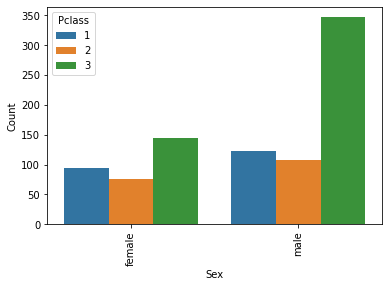

In [82]:
sns.barplot(data=df_question3, y='Count', x='Sex', hue='Pclass')
plt.xticks(rotation=90);

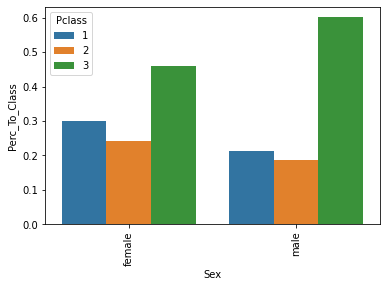

In [83]:
sns.barplot(data=df_question3, y='Perc_To_Class', x='Sex', hue='Pclass')
plt.xticks(rotation=90);

## Question 4

**Description:** Má vliv místo nalodění na cenu?

**Insight gained:**

Ano má, lze pozorovat že lístky z místa nalodění Cherbourg má o poznání dražší lístky. Následuje Southampton a nejlevěji to pasažéry vyšlo z Queenstown.

<AxesSubplot:xlabel='Embarked', ylabel='Fare'>

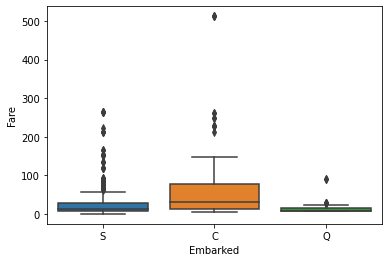

In [84]:
sns.boxplot(data=df, x='Embarked', y='Fare')

## Question 5

**Description:** Cena a třída lístku

**Insight gained:** 

Z grafu lze pozorovat, že první třída měli mnohem vyšší cenu než ostatní dvě.

Zarážející možná je, že 2 a 3 nemá tak signifikatní rozdíl.

<AxesSubplot:xlabel='Pclass', ylabel='Fare'>

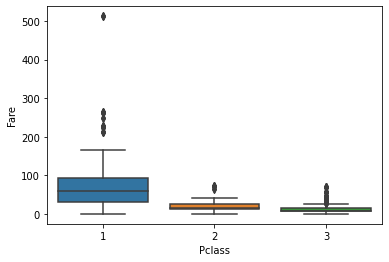

In [85]:
sns.boxplot(data=df, x='Pclass', y='Fare')

## Question 6

**Description:** Přežilo více žen?

**Insight gained:** 

Na druhém grafu lze pozorovat, že vzhledem k celkovému počtu lidí přežilo více žen než můžu. I když první graf znázorňuje, že můžu bylo na palubě poznatelně více.

Na posledním grafu, pak lze pozorovat že procentuálně ženy měly větší úspěch v přežití.

In [86]:
df_question6 = df.groupby(['Sex', 'Survived']).Survived.count().reset_index(name='Count')
df_question6 = df_question6[df_question6.Survived == 1]
df_question6_tmp = df.groupby('Sex').Sex.count().reset_index(name='Count')

df_question6['Count_Class'] = list(map(lambda x: df_question6_tmp['Count'].values[1] if x == 'female' else df_question6_tmp['Count'].values[0] ,df_question6['Sex'])) 

df_question6['Perc_To_Class'] = df_question6['Count'] / df_question6['Count_Class'] 

<AxesSubplot:xlabel='Sex', ylabel='Count'>

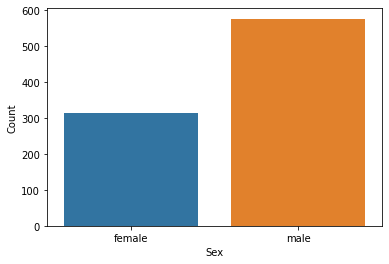

In [87]:
sns.barplot(data=df_question6_tmp, x='Sex', y='Count')

In [88]:
df_question6

,Sex,Survived,Count,Count_Class,Perc_To_Class
1,female,1,233,577,0.403813
3,male,1,109,314,0.347134


<AxesSubplot:xlabel='Sex', ylabel='Count'>

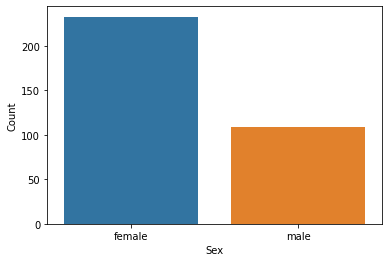

In [89]:
sns.barplot(data=df_question6, x='Sex', y='Count')

<AxesSubplot:xlabel='Sex', ylabel='Perc_To_Class'>

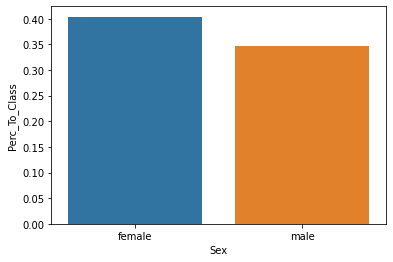

In [90]:
sns.barplot(data=df_question6, x='Sex', y='Perc_To_Class')

## Question 7

**Cz Description:** Byly lístky pro muže dražší?

**Description:** Is there any effect caused by ... on ...?

**Insight gained:**

Odpověď zní ne. Z grafu lze pozorovat, že dražší lístky měly ženy. U žen je průměrná hodnota vyšší a 50 procent vzorku mezi 1 a 3 kvartilem je take výraznější.

<AxesSubplot:xlabel='Sex', ylabel='Fare'>

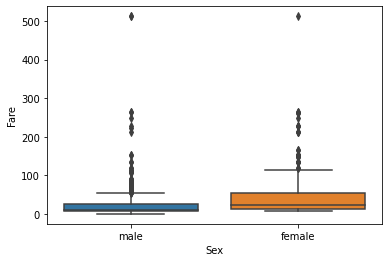

In [91]:
sns.boxplot(data=df, x='Sex', y='Fare')

## Question 8

**Description:** Lišil se věk dle pohlaví?

**Insight gained:**

Z následujícího boxplotu nelze říct, že by se nějak výrazně lišil věk dle pohlaví. Malý rozdíl můžeme pozorovat ve větším rozptylu u můžu společně s vyšší průměrnou hodnotou.

Zároveň lze pozorovat, že mezi muži se vyskytovali starší pasažeři, kteří už jsou v boxplotu bráni jako outlieři.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

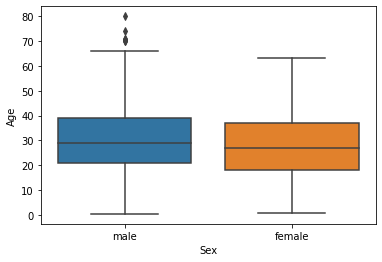

In [92]:
sns.boxplot(data=df, x='Sex', y='Age')

## Question 9

**Description:** Přežili více lide v páru/manželství/sourozenectví

**Insight gained:**

Lze pozorovat že více přežívali lidé, kteří měli na palubě alespoň nějaký vztah.


In [98]:
df_question9_tmp = df.copy()

In [99]:
df_question9_tmp['FamilySize'] = df_question9_tmp['SibSp'] + df_question9_tmp['Parch']
df_question9_tmp['IsFamily'] = df_question9_tmp['FamilySize'] > 0
df_question9 = df_question9_tmp.groupby(['IsFamily', 'Survived']).Survived.count().reset_index(name='Count')
df_question9

,IsFamily,Survived,Count
0,False,0,374
1,False,1,163
2,True,0,175
3,True,1,179


<AxesSubplot:xlabel='IsFamily', ylabel='Count'>

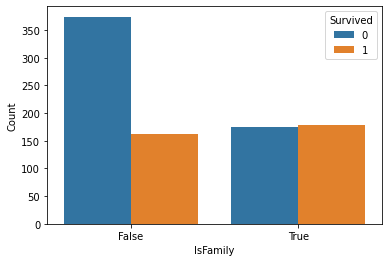

In [102]:
sns.barplot(data=df_question9, x='IsFamily', y='Count', hue='Survived')

In [101]:
df_question10 = df_question9_tmp.groupby(['FamilySize', 'Survived']).Survived.count().reset_index(name='Count')

In [103]:
df_question10

,FamilySize,Survived,Count
0,0,0,374
1,0,1,163
2,1,0,72
3,1,1,89
4,2,0,43
5,2,1,59
6,3,0,8
7,3,1,21
8,4,0,12
9,4,1,3


<AxesSubplot:xlabel='FamilySize', ylabel='Count'>

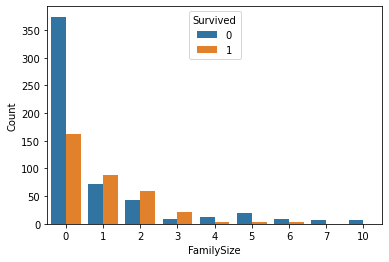

In [104]:
sns.barplot(data=df_question10, x='FamilySize', y='Count', hue='Survived')